https://musicinformationretrieval.com/mfcc.html

In [1]:
import numpy as np, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
import librosa.display
import json

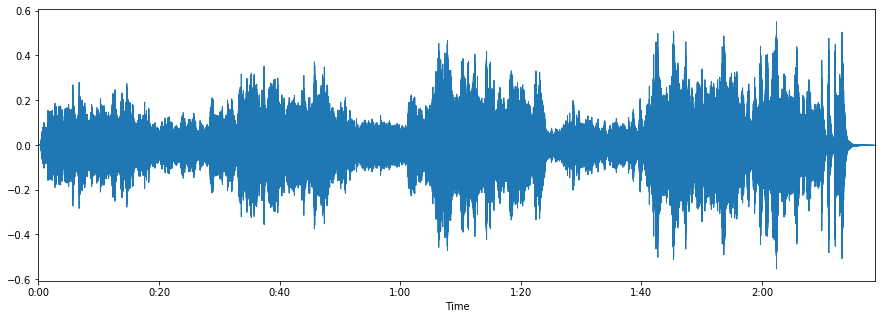

In [2]:
plt.rcParams['figure.figsize'] = (15,5)

#target_file = 'raw_14_dala'
#audio_file_path = 'data/audio/dataset/' + target_file + '.wav'
#poses_file_path = 'dataset/poses/' + target_file + '.json'
#save_dir = 'dataset/audio/'
#audio_mfccs_path = save_dir + target_file + '.json'

target_file = 'test_waltz'
audio_file_path = 'data/audio/waltz.wav'
#poses_file_path = 'dataset/poses/' + target_file + '.json'
save_dir = 'data/audio'
audio_mfccs_path = save_dir + target_file + '.json'

x, fs = librosa.load(audio_file_path)
librosa.display.waveplot(x, sr=fs)

In [15]:
IPython.display.Audio(x, rate=fs)

seconds * sample_rate / hop_lenghth

In [16]:
mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc=28, n_fft=1000, hop_length=918)
print(mfccs.shape)

(28, 3336)


In [26]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[7.9827647e-09 1.8626451e-09 5.5879354e-09 ... 2.1287374e-09 2.1287374e-09
 2.1287374e-09]
[0.99999994 1.         1.0000001  ... 0.99999994 0.99999994 0.99999994]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [6]:
#with open(poses_file_path) as f:
  #  estimated_poses = json.load(f)

In [7]:
#frame_indexes = []
#for key, value in estimated_poses.items():
#    frame_indexes.append(int(key))
#frame_indexes.sort()

In [18]:
mfccs = mfccs.transpose()

In [19]:
mfccs.shape


(3336, 28)

In [20]:
mfccs_dict = {}

t = []
t_2 = []

for idx, mfcc in enumerate(mfccs):
    try:
        t.append(list(range(28)))
        t_2.append(mfcc[:10].tolist())
        #mfccs_dict[idx] = (mfcc.tolist(), mfcc.tolist())
    except:
        print(mfccs.shape, idx, 'is out')
        
mfccs_dict[0] = (t_2, t)        

In [21]:
with open(audio_mfccs_path, 'w') as j_f:
    j_f.write(json.dumps(mfccs_dict))
    print('File is written\n')

File is written



In [22]:
with open(audio_mfccs_path) as f:
    mf = json.load(f)

In [23]:
print(len(mf))
#print(len(estimated_poses))

1


In [25]:
mfccs[1]

array([-4.1502967 , -3.427281  ,  1.8366684 , -1.667238  ,  1.0965798 ,
        0.5948595 ,  1.5935891 ,  0.6843744 ,  1.3430996 ,  0.59043545,
        1.3063788 ,  0.33264393,  0.48172554,  0.32383466,  0.35266498,
       -0.24810305,  0.39986542, -0.3789656 , -0.15416278, -0.35789457,
        0.4382972 , -0.18303078, -0.11621251, -0.557931  , -0.05857608,
       -0.28120458,  0.56554544,  0.13523345], dtype=float32)